In [7]:
from lda import guidedlda as glda
import numpy as np

**Importing Clean Corpus**

In [8]:
import joblib
clean_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept.job")

In [9]:
import joblib
whole_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept_noisy.job")

In [10]:
import pandas as pd
labeled_corpus=pd.read_csv(r"C:\Users\LENOVO\Desktop\cs_gs.csv")
freq=labeled_corpus['freq']
terms=labeled_corpus['term']

In [11]:
import gensim
from gensim import corpora
dictionary=whole_corpus['dict']
docs=whole_corpus['docs']
doc_term_matrix = [dictionary.doc2bow(rev) for rev in docs]

**Creating Document Dictionary and Document-Term Matrix**

In [6]:
id2word = [[i,dictionary[i]] for i in range(len(dictionary))]
print(id2word)

[[0, 'analysis'], [1, 'artificial'], [2, 'artificial_bee_colony'], [3, 'color_information'], [4, 'cross_validation'], [5, 'explaining'], [6, 'handle'], [7, 'increase'], [8, 'linear_discriminant'], [9, 'method'], [10, 'neural_networks'], [11, 'novel'], [12, 'objective'], [13, 'principal_component'], [14, 'proposed_method'], [15, 'recall_rate'], [16, 'repetition'], [17, 'result'], [18, 'state-of-the-art'], [19, 'support_vector_machines'], [20, 'total'], [21, 'vector_machine'], [22, 'vision'], [23, 'accident'], [24, 'clinical_data'], [25, 'graphic'], [26, 'healthy_subjects'], [27, 'movement'], [28, 'present_study'], [29, 'purpose'], [30, 'quantify'], [31, 'smoothness'], [32, 'subject'], [33, 'subjects'], [34, 'viewing'], [35, 'virtual'], [36, 'amounts'], [37, 'assists'], [38, 'data_entry'], [39, 'example'], [40, 'export'], [41, 'extraction'], [42, 'implement'], [43, 'input'], [44, 'limitation'], [45, 'link'], [46, 'management_system'], [47, 'moving'], [48, 'occupancy'], [49, 'operating'],

In [7]:
dtm=[]
for i in range(len(docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  dtm.append(doc_counts)

In [8]:
dtm=np.array(dtm)
print(dtm.shape)
print(dtm.sum())

(5746, 8261)
102103


In [9]:
print(len(dictionary))
print(len(docs))

8261
5746


**Computing TF-IDF of Core Concepts**

In [10]:
terms_list=[]
for term in terms:
    terms_list.append(term)

In [11]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#compute TFIDF of terms
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i]))
print(tfidf)

[0.9290144335182324, 0.8266044922097722, 1.391114877133519, 0.6955574385667594, 0.9484874162273993, 0.8025662752693379, 0.7480523395906659, 0.8057447555674342, 0.9563914780292943, 1.0582751062729647, 1.035607741866064, 0.7083199603753239, 0.6955574385667594, 0.8641774236738526, 0.8763598308547551, 0.9274099180890126, 0.8942881353001193, 0.8369199212269294, 0.772582255589253, 0.8536386746046594, 0.7459601515063797, 0.8971682903252405, 0.8239321336042487, 0.8694467982084494, 0.8346689262801114, 0.7760351587315085, 1.1592623976112657, 0.8578541742323367, 0.7949227869334394, 0.7190031949229424, 0.7809767731275896, 1.0930188320334793, 0.8832475410371549, 0.6955574385667594, 0.7490618569180486, 0.7651131824234354, 0.711733192952033, 0.6955574385667594, 1.391114877133519, 0.7469895026861325, 0.6955574385667594, 0.9251589231421946, 0.7486534262436113, 0.934655308074083, 0.7495231019038356, 0.8316447635037342, 0.9677320884407088, 0.881039422184562, 1.8084493402735746, 0.9301537344147197, 0.7271

In [13]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [14]:
#determining term counts of core concepts
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_counts={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_counts[core_concept]=word_counts[index]
print(core_concepts_counts)

{'data_structures': 223, 'cryptography': 727, 'software_engineering': 546, 'computer_graphics': 141, 'network_security': 354, 'computer_programming': 259, 'algorithm_design': 237, 'operating_systems': 158, 'distributed_computing': 258, 'machine_learning': 291}


In [15]:
#determining TF-IDF of core concepts
core_concepts_tfidf={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_tfidf[core_concept]=tfidf[index]
print(core_concepts_tfidf)

{'data_structures': 0.9017983069789963, 'cryptography': 2.5538901911011824, 'software_engineering': 2.098200892030114, 'computer_graphics': 1.886030746882944, 'network_security': 2.1984583326127933, 'computer_programming': 1.7322055441229876, 'algorithm_design': 1.7725496015088387, 'operating_systems': 0.7906336352053813, 'distributed_computing': 2.5275185795806188, 'machine_learning': 3.212812930522651}


**Table of Core concepts Measures**

In [16]:
#creating dataframe for the measures of core concepts
df_core_concepts=pd.DataFrame(core_concepts,columns=['seed words'])
df_core_concepts['Counts']=core_concepts_counts.values()
df_core_concepts['TF-IDF']=core_concepts_tfidf.values()
# Import seaborn library
import seaborn as sns
# Declaring the cm variable by the 
# color palette from seaborn
cm = sns.light_palette("purple", as_cmap=True)
df_core_concepts.style.background_gradient(cmap=cm).set_precision(4)

,seed words,Counts,TF-IDF
0,data_structures,223,0.9018
1,cryptography,727,2.5539
2,software_engineering,546,2.0982
3,computer_graphics,141,1.8860
4,network_security,354,2.1985
5,computer_programming,259,1.7322
6,algorithm_design,237,1.7725
7,operating_systems,158,0.7906
8,distributed_computing,258,2.5275
9,machine_learning,291,3.2128


**Table of Seed Words  Measures**

In [17]:
seed_topics_list=[['data_structures', 'binary_search_tree', 'data_retrieval','graphs'],
                   ['cryptography', 'cypher', 'hash','encryption_key'], 
                   ['software_engineering', 'software_environment', 'software_module', 'malwares'],
                   ['computer_graphics', 'graph_partitioning', 'digital_image_processing', 'binary_image'],
                   ['network_security', 'network_lifetime', 'channel_attack', 'relay_networks'],
                   ['computer_programming','programming_approach','function_calls','debugging'],
                   ['algorithm_design','continuous_optimization','inference_algorithm','linearized_model'],
                   ['operating_systems','robust_system','virtual_platform','android'],
                   ['distributed_computing','web_service','gpu_parallel_computing','cloud_computing_platform'],
                   ['machine_learning','statistical_learning','unsupervised_approach','deep_learning_algorithm']]

In [18]:
seed_words=[]
for seed_topic in seed_topics_list:
    for seed in seed_topic:
        seed_words.append(seed)
#determining term counts of seed words
seed_words_counts={}
for seed in seed_words:
    index=word2id[seed]
    seed_words_counts[seed]=word_counts[index]
#determining TF-IDF of seed words
seed_words_tfidf={}
for seed in seed_words:
    index=word2id[seed]
    seed_words_tfidf[seed]=tfidf[index]
#creating dataframe for the measures of seed words
df_seed_words=pd.DataFrame(seed_words,columns=['seed words'])
df_seed_words['Counts']=seed_words_counts.values()
df_seed_words['TF-IDF']=seed_words_tfidf.values()


In [19]:
# Import seaborn library
import seaborn as sns
# Declaring the cm variable by the 
# color palette from seaborn
cm = sns.light_palette("purple", as_cmap=True)
df_seed_words.style.background_gradient(cmap=cm).set_precision(4)

,seed words,Counts,TF-IDF
0,data_structures,223,0.9018
1,binary_search_tree,9,1.2520
2,data_retrieval,7,0.6956
3,graphs,10,0.6956
4,cryptography,727,2.5539
5,cypher,3,1.0433
6,hash,28,1.0250
7,encryption_key,6,0.8347
8,software_engineering,546,2.0982
9,software_environment,4,0.9274


**Visualizing Terms Measure**

In [20]:
import pandas as pd
df_terms=pd.DataFrame(vocab,columns=['terms'])
df_terms['frequency']=freq
df_terms['TF-IDF']=tfidf
print(df_terms)

                            terms  frequency    TF-IDF
0                        analysis          3  0.929014
1                      artificial         10  0.826604
2           artificial_bee_colony          5  1.391115
3               color_information          4  0.695557
4                cross_validation          4  0.948487
...                           ...        ...       ...
8256                         makd          6  2.086672
8257                        simit          3  2.434451
8258              memory_contents          8  1.043336
8259  computer_network_technology          3  0.869447
8260                  word_clouds         12  2.782230

[8261 rows x 3 columns]


In [21]:
filtered_terms=[]
for i in range(len(vocab)):
    if tfidf[i]>3.3:
        filtered_terms.append(vocab[i])
print(filtered_terms)

['operating_system', 'multi-proxy_signature', 'uncertainty_measures', 'scoping', 'sanger', 'secondary_studies', 'technical_debt', 'ontology_matching', 'socialbots', 'owl_ontologies', 'geoweb', 'grinding', 'security_game', 'electronic_voting', 'mocas', 'command_queue', 'pretreatment', 'mechatronic_system', 'flame', 'faulty_element', 'lisa', 'memif', 'z-wave']


In [22]:
count=0
for term in filtered_terms:
    labels=labeled_corpus['label']
    terms=labeled_corpus['term']
    terms=list(terms)
    id=terms.index(term)
    if(labels[id]=='o'):
        count=count+1
print(count)

    

13


In [23]:
print(len(filtered_terms))

23


**Filtering Terms**

In [24]:
core_concepts_ids=[]
for core_concept in core_concepts:
    core_concepts_ids.append(word2id[core_concept])

In [25]:
#Determining the most general terms
tfidf_max= 3
general_words_ids = []
general_words_ids += [id for id,value in enumerate(tfidf) if ((value > tfidf_max) and (id not in core_concepts_ids))]
#Filter Out of the Dictionary
dictionary.filter_tokens(bad_ids=general_words_ids)


In [26]:
# Filtering low-frequent terms
#dictionary.filter_extremes(no_below=2, no_above=1.0)

In [27]:
print(len(dictionary))

8224


**Computing New Document-Term distribution after Filtering**

In [28]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [29]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)

In [30]:
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)

In [31]:
new_dtm=np.array(new_dtm)
print(new_dtm.shape)
print(new_dtm.sum())

(5746, 8224)
102020


**Creating Seeded LDA Model**

In [32]:
model = glda.GuidedLDA(n_topics=10, n_iter=100, random_state=7, refresh=20)

In [33]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [34]:
seed_topics = {}
for t_id, st in enumerate(seed_topics_list):
     for word in st:
         seed_topics[word2id[word]] = t_id

In [35]:
print(seed_topics)

{353: 0, 6218: 0, 1056: 0, 3889: 0, 639: 1, 7501: 1, 3505: 1, 3800: 1, 1281: 2, 6094: 2, 4541: 2, 6214: 2, 2438: 3, 7253: 3, 1030: 3, 4683: 3, 898: 4, 1614: 4, 8163: 4, 6971: 4, 1965: 5, 6010: 5, 7212: 5, 1339: 5, 438: 6, 3103: 6, 7731: 6, 1159: 6, 530: 7, 3558: 7, 7797: 7, 1887: 7, 2694: 8, 4306: 8, 6335: 8, 6433: 8, 605: 9, 5794: 9, 4380: 9, 5159: 9}


In [36]:
model.fit(new_dtm, seed_topics=seed_topics, seed_confidence=0.7)

INFO:lda:n_documents: 5746
INFO:lda:vocab_size: 8224
INFO:lda:n_words: 102020
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1345309
INFO:lda:<20> log likelihood: -916002
INFO:lda:<40> log likelihood: -894487
INFO:lda:<60> log likelihood: -881954
INFO:lda:<80> log likelihood: -874312
INFO:lda:<99> log likelihood: -868831


**Topic-Word Distributions (Top 20 Words)**

In [37]:
print(len(vocab))

8224


In [38]:
print(len(dictionary))

8224


In [39]:
n_top_words = 20
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
     print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: relational propose present result analysis data operating processing cloud_computing query implement challenge data_structures execution foci uses term example method experimental_result
Topic 1: method result propose processing cryptography present experimental_result technique proposed_method 2016 graphic term uses robust computer computational analysis vision furthermore parallel
Topic 2: engineering result software_engineering present method 2016 analysis software elsevier_b.v._all_rights requirement operating help researcher propose challenge foci aims product 2015 complex
Topic 3: propose cryptography present relational secure result encryption analysis finally furthermore quanta proposed_scheme uses 2015 public 2016 security operating internet elsevier_b.v._all_rights
Topic 4: propose result network_security experimental_result analysis detecting internet present finally foci traffic effective intrusion_detection attacker method technique threat processing 2016 term
Top

**Saving Seeded LDA Model**

In [40]:
from six.moves import cPickle as pickle
with open('guidedlda_model.pickle', 'wb') as file_handle:
     pickle.dump(model, file_handle)

**Evaluation**

In [41]:
beta=model.topic_word_
theta=model.transform(new_dtm)
logs=model.loglikelihoods_
print(logs)

[-1345309.4337779933, -916002.3026494595, -894486.7518559172, -881953.9256698291, -874311.8974896354]


In [42]:
theta=np.asarray(theta)
print(theta.shape)
docs_length=[]
for doc in docs:
  docs_length.append(len(doc))

(5746, 10)


In [43]:
from sklearn import preprocessing
normalized_theta=preprocessing.normalize(theta, norm='l2')
  

**Computing Term Frequency of Core Concepts**

In [44]:
#Compute term_frequency
topic_freq= (theta.T * docs_length).T.sum()
term_topic_freq = (beta.T * topic_freq).T
term_frequency = np.sum(term_topic_freq, axis=0)
print(term_frequency)

[10614.4789152    674.31801002    47.11176743 ...    26.08500639
    62.53842181    14.98010404]


In [45]:
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_freq={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_freq[core_concept]=term_frequency[index]
print(core_concepts_freq)

{'data_structures': 1887.8412349503676, 'cryptography': 3230.0867748414967, 'software_engineering': 2149.3678150226283, 'computer_graphics': 659.708331970546, 'network_security': 1685.5640932548815, 'computer_programming': 1570.420443787579, 'algorithm_design': 1019.0572605305687, 'operating_systems': 1805.8115046261541, 'distributed_computing': 904.4317359691082, 'machine_learning': 447.15076888235114}


**Computing Saliency of Core Concepts**

In [46]:
# compute the distinctiveness and saliency of the terms:
# this determines the R terms that are displayed when no topic is selected
term_proportion = term_frequency / term_frequency.sum()
topic_proportion = (topic_freq / topic_freq.sum())
topic_given_term = beta /beta.sum()
kernel = (topic_given_term* np.log((topic_given_term.T / topic_proportion).T))
distinctiveness = kernel.sum()
saliency = term_proportion * distinctiveness

In [47]:
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#computing tf-idf after filtering
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i])) 

In [48]:
#determining measures of all terms
terms_saliency={}
for term in vocab:
    index=word2id[term]
    terms_saliency[term]=saliency[index]
df_terms=pd.DataFrame(vocab,columns=['Terms'])
df_terms['TF-IDF']=tfidf
df_terms['term counts']=word_counts
df_terms['Saliency']=terms_saliency.values()
print(df_terms)

                            Terms    TF-IDF  term counts  Saliency
0                        analysis  0.933194         1158 -0.076955
1                      artificial  0.830323           82 -0.004889
2           artificial_bee_colony  1.397374           12 -0.000342
3               color_information  0.698687            4 -0.000208
4                cross_validation  0.952755           15 -0.000554
...                           ...       ...          ...       ...
8219                         makd  1.397374            6 -0.000211
8220                        simit  1.630269            7 -0.000189
8221              memory_contents  0.698687            3 -0.000189
8222  computer_network_technology  1.746717            5 -0.000453
8223                  word_clouds  2.794747            8 -0.000109

[8224 rows x 4 columns]


In [49]:
core_concepts_saliency={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.013686777916336906, 'cryptography': -0.02341800757356314, 'software_engineering': -0.015582835780949784, 'computer_graphics': -0.004782860582804947, 'network_security': -0.01222027625047499, 'computer_programming': -0.011385489124545437, 'algorithm_design': -0.00738812679302413, 'operating_systems': -0.013092065458160286, 'distributed_computing': -0.006557096053165554, 'machine_learning': -0.0032418262486850124}


In [50]:
df_core_concepts=pd.DataFrame(core_concepts,columns=['core_concepts'])
df_core_concepts['TF-IDF']=core_concepts_tfidf.values()
df_core_concepts['term counts']=core_concepts_counts.values()
#determining saliency of term concepts
core_concepts_saliency={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)
df_core_concepts['Saliency']=core_concepts_saliency.values()
print(df_core_concepts)

{'data_structures': -0.013686777916336906, 'cryptography': -0.02341800757356314, 'software_engineering': -0.015582835780949784, 'computer_graphics': -0.004782860582804947, 'network_security': -0.01222027625047499, 'computer_programming': -0.011385489124545437, 'algorithm_design': -0.00738812679302413, 'operating_systems': -0.013092065458160286, 'distributed_computing': -0.006557096053165554, 'machine_learning': -0.0032418262486850124}
           core_concepts    TF-IDF  term counts  Saliency
0        data_structures  0.901798          223 -0.013687
1           cryptography  2.553890          727 -0.023418
2   software_engineering  2.098201          546 -0.015583
3      computer_graphics  1.886031          141 -0.004783
4       network_security  2.198458          354 -0.012220
5   computer_programming  1.732206          259 -0.011385
6       algorithm_design  1.772550          237 -0.007388
7      operating_systems  0.790634          158 -0.013092
8  distributed_computing  2.527519     

**Table of Core Concepts Measures**

In [51]:
# Import seaborn library
import seaborn as sns
# Declaring the cm variable by the 
# color palette from seaborn
cm = sns.light_palette("pink", as_cmap=True)
df_core_concepts.style.background_gradient(cmap=cm).set_precision(6)

,core_concepts,TF-IDF,term counts,Saliency
0,data_structures,0.901798,223,-0.013687
1,cryptography,2.553890,727,-0.023418
2,software_engineering,2.098201,546,-0.015583
3,computer_graphics,1.886031,141,-0.004783
4,network_security,2.198458,354,-0.012220
5,computer_programming,1.732206,259,-0.011385
6,algorithm_design,1.772550,237,-0.007388
7,operating_systems,0.790634,158,-0.013092
8,distributed_computing,2.527519,258,-0.006557
9,machine_learning,3.212813,291,-0.003242


**Computing Relevance of Core Concepts**

In [52]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [53]:
#converting distribution matrices into dataframes
def _df_with_names(data, index_name, columns_name):
   if type(data) == pd.DataFrame:
      # we want our index to be numbered
      df = pd.DataFrame(data.values)
   else:
      df = pd.DataFrame(data)
   df.index.name = index_name
   df.columns.name = columns_name
   return df
## compute relevance each topic
topic_term_dists = _df_with_names(beta, 'topic', 'term')
doc_topic_dists  = _df_with_names(beta, 'doc', 'topic')
log_lift = np.log(topic_term_dists / term_proportion)
log_ttd = np.log(topic_term_dists)
R=len(vocab)
def _find_relevance(log_ttd, log_lift, R, lambda_):
   relevance_measure= lambda_ * log_ttd + (1 - lambda_) * log_lift
   return relevance_measure.T
relevance_0=_find_relevance(log_ttd, log_lift, R, lambda_=0)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [54]:
relevance_1=_find_relevance(log_ttd, log_lift, R, lambda_=0.5)

In [55]:
relevance_2=_find_relevance(log_ttd, log_lift, R, lambda_=1)

In [56]:
print(relevance_0)

topic         0         1         2         3         4         5         6  \
term                                                                          
0     -0.015097 -0.526711  0.172242 -0.015547  0.009489 -0.290290 -0.719060   
1     -6.363916 -6.182494 -0.187526 -5.907671 -6.088047 -6.090624 -6.593488   
2     -3.702737 -3.521315 -3.742953 -3.246492 -3.426868 -3.429445  1.370996   
3     -3.205210 -3.023788 -3.245427 -2.748965 -2.929341 -2.931919 -3.434782   
4     -4.187169 -4.005747 -4.227386 -3.730925 -3.911300 -3.913878 -4.416742   
...         ...       ...       ...       ...       ...       ...       ...   
8219  -3.223276  2.261451 -3.263493 -2.767031 -2.947407 -2.949985 -3.452848   
8220  -3.111575 -2.930153 -3.151791 -2.655330 -2.835706 -2.838283 -3.341147   
8221  -3.111575 -2.930153 -3.151791 -2.655330 -2.835706 -2.838283 -3.341147   
8222  -3.985995 -3.804573 -4.026212 -3.529750  2.283835 -3.712703 -4.215567   
8223  -2.556937 -2.375515 -2.597153 -2.100692 -2.281

In [57]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_0=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_0.insert(1,core_concept,relevance_0.loc[index])
print(df_relevance_0)

  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0         -5.953110               1.280211   
1              topic 1         -5.771688              -6.476099   
2              topic 2         -0.286216              -6.697737   
3              topic 3         -5.496865              -6.201276   
4              topic 4         -5.677241               1.168484   
5              topic 5         -5.679818              -6.384229   
6              topic 6         -1.567562               0.491291   
7              topic 7         -5.888983              -6.593394   
8              topic 8         -5.548076               0.433374   
9              topic 9          2.199115              -7.188173   

   operating_systems  algorithm_design  computer_programming  \
0           0.514672         -6.776847             -7.209313   
1          -7.167557         -6.595425             -7.027891   
2           0.827162          0.733072             -7.249529   
3     

In [58]:
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.013686777916336906, 'cryptography': -0.02341800757356314, 'software_engineering': -0.015582835780949784, 'computer_graphics': -0.004782860582804947, 'network_security': -0.01222027625047499, 'computer_programming': -0.011385489124545437, 'algorithm_design': -0.00738812679302413, 'operating_systems': -0.013092065458160286, 'distributed_computing': -0.006557096053165554, 'machine_learning': -0.0032418262486850124}


**pyLDAviz**

In [59]:
import pyLDAvis
model_viz = pyLDAvis.prepare(beta,normalized_theta,docs_length,vocab,term_frequency)
pyLDAvis.display(model_viz)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

**Plot Of Dominant Topics**

In [60]:
from pandas import DataFrame
df_document_topic_term= DataFrame(beta.transpose(),columns=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10'])
df_document_topic_term['dominant_topic'] = np.argmax(df_document_topic_term.values, axis=1)
df_document_topic_term['terms']=vocab
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms
0,8.394701e-03,0.005033,1.012431e-02,0.008391,0.008604,0.006375,4.152198e-03,9.845628e-03,0.014265,0.010040,8,analysis
1,9.326409e-07,0.000001,4.488346e-04,0.000001,0.000001,0.000001,7.413316e-07,9.944075e-07,0.002379,0.002579,9,artificial
2,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,1.490077e-04,9.944075e-07,0.000001,0.000220,9,artificial_bee_colony
3,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,7.413316e-07,9.944075e-07,0.000001,0.000220,9,color_information
4,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,7.413316e-07,9.944075e-07,0.000001,0.000604,9,cross_validation


In [61]:
matrix=beta.transpose()
Max_Prob=[]
Min_Prob=[]
for row in matrix:
    maxi=row.max()
    mini=row.min()
    Max_Prob.append(maxi)
    Min_Prob.append(mini)
df_document_topic_term['Max Prob']=Max_Prob
df_document_topic_term['Min Prob']=Min_Prob

In [62]:
print(max(Max_Prob))
print(min(Max_Prob))
print(min(Min_Prob))
print(max(Min_Prob))

0.028467875136034354
7.487449255851332e-05
5.485993162258123e-07
0.009421215617935193


In [63]:
df_document_topic_term['Delta']=df_document_topic_term['Max Prob']-df_document_topic_term['Min Prob']
df_document_topic_term= df_document_topic_term.sort_values(by='Delta', ascending=False)
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms,Max Prob,Min Prob,Delta
143,2.985384e-03,0.004362,1.800714e-04,0.000001,0.003442,0.000001,2.846788e-02,3.481420e-03,0.000001,8.783075e-04,6,parallel,0.028468,1.225755e-06,0.028467
382,9.326409e-07,0.000001,8.071857e-04,0.000001,0.001476,0.025129,7.413316e-07,9.944075e-07,0.008252,2.068274e-02,5,learning,0.025129,7.413316e-07,0.025128
75,9.326409e-07,0.000001,8.958775e-07,0.000001,0.002090,0.000001,7.413316e-07,9.944075e-07,0.019998,5.485993e-07,8,ltd.,0.019998,5.485993e-07,0.019997
83,9.326409e-07,0.000001,8.958775e-07,0.000001,0.002459,0.000001,7.413316e-07,9.944075e-07,0.019998,5.485993e-07,8,sons,0.019998,5.485993e-07,0.019997
64,9.326409e-07,0.000001,8.958775e-07,0.000296,0.002213,0.000001,7.413316e-07,9.944075e-07,0.019578,5.485993e-07,8,copyright,0.019578,5.485993e-07,0.019578


In [64]:
df_document_topic_term.tail(1200)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms,Max Prob,Min Prob,Delta
7377,9.326409e-07,0.000001,9.048363e-05,0.000001,0.000001,0.000001,7.413316e-07,1.998759e-04,0.000001,0.000110,7,example_application,0.000200,7.413316e-07,0.000199
4064,9.326409e-07,0.000113,8.958775e-07,0.000001,0.000001,0.000001,7.413316e-07,1.998759e-04,0.000001,0.000110,7,objects,0.000200,7.413316e-07,0.000199
2787,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,7.413316e-07,1.998759e-04,0.000001,0.000055,7,kidney,0.000200,7.413316e-07,0.000199
1822,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,7.413316e-07,1.998759e-04,0.000001,0.000055,7,relief,0.000200,7.413316e-07,0.000199
2327,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000124,7.413316e-07,1.998759e-04,0.000001,0.000110,7,sign_language,0.000200,7.413316e-07,0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,9.326409e-07,0.000001,9.048363e-05,0.000001,0.000001,0.000001,7.413316e-07,9.944075e-07,0.000001,0.000055,2,water_management,0.000090,7.413316e-07,0.000090
4828,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,7.487449e-05,9.944075e-07,0.000001,0.000055,6,processes,0.000075,8.958775e-07,0.000074
7616,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,7.487449e-05,9.944075e-07,0.000001,0.000055,6,pore_space,0.000075,8.958775e-07,0.000074
6723,9.326409e-07,0.000001,8.958775e-07,0.000001,0.000001,0.000001,7.487449e-05,9.944075e-07,0.000001,0.000055,6,difference_image,0.000075,8.958775e-07,0.000074


In [65]:
indices=[]
for i in range(len(vocab)):
    row=df_document_topic_term.loc[i]
    if (row[14]<0.00025):
        indices.append(i)
    

In [66]:
#for index in indices:
   # df_document_topic_term.at[index,'dominant_topic']=10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


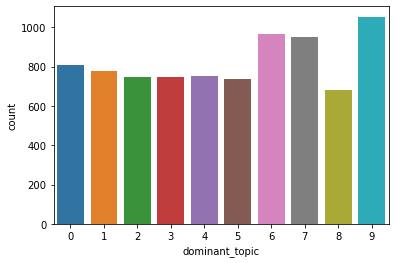

In [67]:
import seaborn as sns
sns.countplot(df_document_topic_term.dominant_topic)

**Gold Standard**

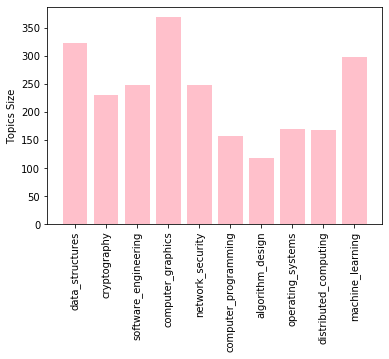

In [68]:
import matplotlib.pyplot as plt
gs=clean_corpus['gs']
gs.pop('o')
gs_termcounts=[]
core_concepts=[]
for core_concept in gs:
    core_concepts.append(core_concept)
    gs_termcounts.append(len(gs[core_concept]))
plt.bar(core_concepts,gs_termcounts,width=0.8,color='pink')
plt.xticks(rotation=90)
plt.ylabel("Topics Size")
plt.show()

In [69]:
label=labeled_corpus['label']
filtered_labels=[]
for i in range(len(vocab)):
    id,word=id2word[i]
    index=terms_list.index(word)
    filtered_labels.append(label[index])

**Clusters Formation**

In [70]:
clusters=[]
for i in range(10):
    cluster=[]
    for j in range(len(vocab)):
        row=df_document_topic_term.loc[j]
        if(row['dominant_topic']==i):
            cluster.append(row['terms'])
    clusters.append(cluster)

In [71]:
#each sample contains all the features (frequency,tf-idf and saliency) of terms in a cluster
measures=df_terms.drop(axis=1,columns='Terms')
samples=[]
clusters_labels=[]
for cluster in clusters:
    indexes=[]
    sample=[]
    cluster_labels=[]
    for term in cluster:
        indexes.append(word2id[term])
    for index in indexes:
        sample.append(measures.loc[index])
        cluster_labels.append(filtered_labels[index])
    samples.append(sample)
    clusters_labels.append(cluster_labels)

**Evaluation (With and Without Gold Standard)**

In [72]:
feature_matrix=model.topic_word_
feature_matrix=feature_matrix.transpose()

In [73]:
#calculating cosine similarity between terms feature vectors (feature vectors= topic-term probabilities)
from numpy import dot
from numpy.linalg import norm
import scipy.spatial.distance as distance
a=b=feature_matrix
cos_sim = dot(a, b.transpose())/(norm(a)*norm(b))
print(cos_sim)

[[2.78865868e-02 2.24056761e-03 1.01218648e-04 ... 7.12856419e-05
  1.50273315e-04 4.14965985e-05]
 [2.24056761e-03 4.35090143e-04 1.98651338e-05 ... 1.86053915e-07
  2.00185359e-07 1.00202435e-05]
 [1.01218648e-04 1.98651338e-05 2.45568512e-06 ... 1.53013347e-08
  2.94327790e-08 8.47876121e-07]
 ...
 [7.12856419e-05 1.86053915e-07 1.53013347e-08 ... 1.38979538e-06
  2.83014412e-08 9.38526881e-09]
 [1.50273315e-04 2.00185359e-07 2.94327790e-08 ... 2.83014412e-08
  8.44626137e-06 2.35167131e-08]
 [4.14965985e-05 1.00202435e-05 8.47876121e-07 ... 9.38526881e-09
  2.35167131e-08 4.23280298e-07]]


In [74]:
#computing silhouette of samples composed of features (freq,tf-idf,saliency)
y_pred_1=df_document_topic_term.dominant_topic.tolist()
from sklearn.metrics import silhouette_score
silhouette_1=silhouette_score(feature_matrix,y_pred_1)
print("The silhouette measure according to Euclidean distance: ",silhouette_1)
silhouette_2=silhouette_score(cos_sim,y_pred_1)
print("The silhouette measure according to cosine distance: ",silhouette_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


The silhouette measure according to Euclidean distance:  -0.18930151700923276


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


The silhouette measure according to cosine distance:  -0.23597456332416927


In [75]:
from sklearn.metrics import calinski_harabasz_score
#computing calinski of samples composed of features (freq,tf-idf,saliency)
calinski_harabasz_score_1=calinski_harabasz_score(feature_matrix,y_pred_1)
print("The calinski measure according to Euclidean distance: ",calinski_harabasz_score_1)
calinski_harabasz_score_2=calinski_harabasz_score(cos_sim,y_pred_1)
print("The calinski measure according to cosine distance: ",calinski_harabasz_score_2)

The calinski measure according to Euclidean distance:  2.613912363173308
The calinski measure according to cosine distance:  3.4767953139956305


In [76]:
filtered_labels[4208]='o'
y_pred=df_document_topic_term['dominant_topic']

In [77]:
#Calculating Number of Irrelevant terms in Corpus
count=0
labels=labeled_corpus['label']
for label in labels:
    if(label=='o'):
        count=count+1
print(count)

5935


In [78]:
labels_gs=[]
dictionary_label={'operating_systems':0,'network_security':1,'machine_learning':2,'data_structures':3,'cryptography':4,'distributed_computing':5,'computer_programming':6,'software_engineering':7,'computer_graphics':8,'algorithm_design':9,'o':10}
for label in filtered_labels:
    labels_gs.append(dictionary_label[label])
df_document_topic_term['gs label'] =labels_gs
df_document_topic_term.head()
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(labels_gs,df_document_topic_term['dominant_topic'])
print(conf_matrix)

[[ 20   7  27  21  16  19  18  12   7  23   0]
 [ 35  30  18  11  22  25  23  29  14  39   0]
 [ 23  14  34  33  37  30  29  22  48  27   0]
 [ 25  21  33  42  24  35  40  24  32  41   0]
 [ 20  23  17  16  16  23  45  32  14  24   0]
 [ 18  18  15  13  19  30  17  12   5  18   0]
 [ 12  23  14  13  15  19  21  17   4  19   0]
 [ 22  14  17  13  25  23  30  48  15  40   0]
 [ 25  41  26  40  40  30  43  38  36  49   0]
 [ 13  10  10   6  11  10  21  10  12  15   0]
 [595 576 537 541 526 495 681 706 494 758   0]]


In [79]:
from sklearn.metrics import f1_score, precision_recall_fscore_support
p_macro, r_macro, f_macro, support_macro \
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='macro')

p_micro, r_micro, f_micro, support_micro\
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='micro')

print('macro: p {}, r {}, f1 {}'.format(p_macro, r_macro, f_macro))

print('micro: p {}, r {}, f1 {}'.format(p_micro, r_micro, f_micro))


macro: p 0.033283739332138566, r 0.11736241656376543, f1 0.05038209630912709
micro: p 0.035505836575875485, r 0.035505836575875485, f1 0.035505836575875485


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
from sklearn.metrics import adjusted_rand_score
rand_score=adjusted_rand_score(labels_gs,df_document_topic_term['dominant_topic'])
print(rand_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.000489825036869751


In [81]:
print(model.alpha)

0.01


In [82]:
print(model.eta)

0.01


In [83]:
#computing pairwise precision
no_of_pairs=[]
for cluster in clusters:
    length=len(cluster)
    val=length*(length-1)/2
    no_of_pairs.append(val)
den=0
for value in no_of_pairs:
    den=den+value
num=0
for cluster in clusters:
    c=len(cluster)
    for i in range(c-1):
        for j in range(i+1,c):
            term1=cluster[i]
            term2=cluster[j]
            index1=terms.index(term1)
            index2=terms.index(term2)
            label1=labels[index1]
            label2=labels[index2]
            if(label1==label2):
                num=num+1
pairwise_precision=num/den
print(pairwise_precision)

0.5417349069595666


**Probabilities of Top 100 words**

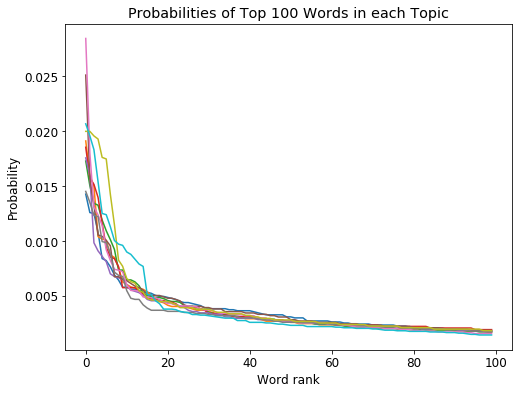

In [84]:
import matplotlib.pyplot as plt
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12

# top 100 words by weight in each topic
top_n_words = 100
topics= model.topic_word_

for i, topic_dist in enumerate(topics):
    topic_dist.sort()
    topic_dist=topic_dist[:-(top_n_words+1):-1]
    probs = [prob for prob in topic_dist]
    plt.plot(range(top_n_words), probs)

plt.xlabel('Word rank')
plt.ylabel('Probability')
plt.title('Probabilities of Top 100 Words in each Topic')
plt.show()

**This part to be updated**

**Topic Coherence**

In [85]:
pip install gensim==3.8.3

  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\cython.cpython-38.pyc'
Consider using the `--user` option or check the permissions.



In [86]:
model1 = gensim.models.Word2Vec(docs, min_count = 1, 
                              vector_size = 100, window = 5)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 8261 word types from a corpus of 124548 raw words and 5746 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 8261 unique words (100.0%% of original 8261, drops 0)', 'datetime': '2021-06-08T11:23:36.394468', 'gensim': '4.0.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 124548 word corpus (100.0%% of original 124548, drops 0)', 'datetime': '2021-06-08T11:23:36.400304', 'gensim': '4.0.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 

In [87]:
#computing topic coherence
#TC-w2vec
import math
from sklearn.metrics.pairwise import cosine_similarity
def topic_coherence_1(topic):
        TC=0
        N=len(topic)
        for i in range(2,N):
            for j in range(1,i-1):
                cos_similarity=cosine_similarity(model1.wv[topic[i]].reshape(1,-1),model1.wv[topic[j]].reshape(1,-1))
                TC=TC+cos_similarity[0][0]
        Total_combinations=math.factorial(N)/(math.factorial(2)*math.factorial(N-2))
        TC=TC/Total_combinations
        return TC
TCS=[]
for cluster in clusters:
    TC=topic_coherence_1(cluster)
    TCS.append(TC)
print(TCS)


[0.956748721922005, 0.96057909966839, 0.955742818796526, 0.9609291653062515, 0.9617475275918742, 0.9599867048470241, 0.9621626651214386, 0.9616569748607294, 0.9534937692517806, 0.9608698211735229]


In [88]:
TC_average=0
for TC in TCS:
    TC_average=TC_average+TC
TC_average=TC_average/10
print(TC_average)

0.9593917268539544


In [89]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}
dtm=[]
for i in range(len(docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  dtm.append(doc_counts)
dtm=np.array(dtm)
print(dtm.shape)
print(dtm.sum())
def generate_co_occurrence_matrix(DTM):
  co_occurrence_matrix=np.dot(DTM.transpose(),DTM)
  return co_occurrence_matrix
co_occurrence_matrix=generate_co_occurrence_matrix(dtm)

(5746, 8224)
102020


In [90]:
co_occurrence_matrix=np.array(co_occurrence_matrix)
print(co_occurrence_matrix.shape)

(8224, 8224)


**Metrics Correlation**

In [3]:
import numpy as np
#calculate the correlation between the two arrays
silhouette=[0.1796,0.1532,0.1358,0.1757,0.1511]
pairwise_precision=[0.545,0.545,0.546,0.55,0.555]
calinski=[84.864,84.728,77.343,68.157,60.85]
tc_w2v=[0.961,0.962,0.966,0.97,0.973]
ari_index=[8.179e-5,-1.534e-6,-6.928e-5,-0.00024,2.261e-5]
micro_metric=[0.0261,0.0271,0.0267,0.0284,0.0281]
print(np.corrcoef(silhouette,pairwise_precision))
print(np.corrcoef(pairwise_precision, calinski))
print(np.corrcoef(pairwise_precision, tc_w2v))
print(np.corrcoef(ari_index,silhouette ))
print(np.corrcoef(ari_index, calinski))
print(np.corrcoef(ari_index, tc_w2v))
print(np.corrcoef(micro_metric, silhouette))
print(np.corrcoef(micro_metric, calinski))
print(np.corrcoef(micro_metric, tc_w2v))

[[ 1.         -0.06316791]
 [-0.06316791  1.        ]]
[[ 1.         -0.96756281]
 [-0.96756281  1.        ]]
[[1.         0.94242676]
 [0.94242676 1.        ]]
[[ 1.         -0.09614704]
 [-0.09614704  1.        ]]
[[1.         0.38215468]
 [0.38215468 1.        ]]
[[ 1.         -0.44261042]
 [-0.44261042  1.        ]]
[[1.         0.03442807]
 [0.03442807 1.        ]]
[[ 1.        -0.8403517]
 [-0.8403517  1.       ]]
[[1.         0.85494615]
 [0.85494615 1.        ]]


In [ ]:
import numpy as np
#calculate the correlation between the two arrays
silhouette=[-0.0244,-0.0426,-0.0721,-0.0018,-0.0803]
pairwise_precision=[0.545,0.545,0.546,0.55,0.555]
calinski=[13.391,17.107,15.2581,11.8973,11.3443]
tc_w2v=[0.961,0.962,0.966,0.97,0.973]
ari_index=[8.179e-5,-1.534e-6,-6.928e-5,-0.00024,2.261e-5]
micro_metric=[0.0261,0.0271,0.0267,0.0284,0.0281]
print(np.corrcoef(silhouette,pairwise_precision))
print(np.corrcoef(pairwise_precision, calinski))
print(np.corrcoef(pairwise_precision, tc_w2v))
print(np.corrcoef(ari_index,silhouette ))
print(np.corrcoef(ari_index, calinski))
print(np.corrcoef(ari_index, tc_w2v))
print(np.corrcoef(micro_metric, silhouette))
print(np.corrcoef(micro_metric, calinski))
print(np.corrcoef(micro_metric, tc_w2v))

In [1]:
import matplotlib.pyplot as plt

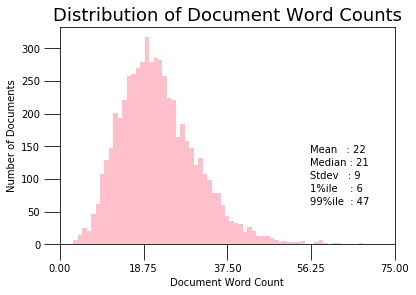

In [12]:
doc_lens = [len(d) for d in docs]

# Plot
plt.figure(figsize=(6,4))
plt.hist(doc_lens, bins = 80, color='pink')
plt.text(56, 140, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(56,  120, "Median : " + str(round(np.median(doc_lens))))
plt.text(56,  100, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(56,  80, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(56,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 75), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,75,5))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=18))
plt.show()